# Data Analysis on SUV Buyers

Data Analysis and Prediction on whether a person would buy an SUV or not

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Data Collection

In [2]:
# Collecting the data 
data = pd.read_csv("./assets/suv_prediction.csv")

In [3]:
print(data.shape)

(400, 5)


In [4]:
data.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


## Data Analysis and Visualization

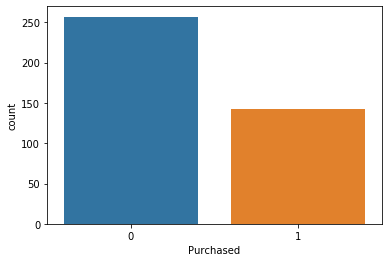

In [5]:
# determining the count of SUV purchases
sns.countplot(x="Purchased", data=data)

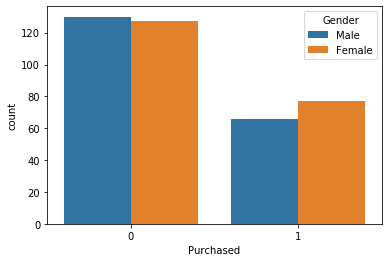

In [6]:
# determining number of SUV Purchases based on Gender

sns.countplot(x="Purchased", hue="Gender", data=data)

In [7]:
# converting the discrete age values to continuous values called age_groups
bins = [18, 30, 40, 50, 60]
labels = ['18-29', '30-39', '40-59', '60+']
data['age_groups'] = pd.cut(data.Age, bins, labels=labels, include_lowest=True)

data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,age_groups
0,15624510,Male,19,19000,0,18-29
1,15810944,Male,35,20000,0,30-39
2,15668575,Female,26,43000,0,18-29
3,15603246,Female,27,57000,0,18-29
4,15804002,Male,19,76000,0,18-29


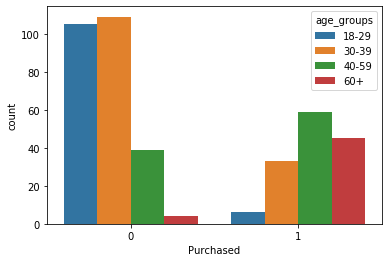

In [8]:
# analyzing the purchase count based on age group

sns.countplot(x="Purchased", hue="age_groups", data=data)

In [9]:
# grouping up salary for the countplot

print(np.min(data['EstimatedSalary']), np.max(data['EstimatedSalary']))

15000 150000


In [10]:
sal_bins = [15000, 30000, 45000, 60000, 75000, 90000, 105000, 120000, 135000, 150000]
sal_labels = ['15-29k', '30-44k', '40-59k', '60-74k', '75-89k', '90-104k', '105-119k', '120-134k', '135K+']
data['salary_groups'] = pd.cut(data.EstimatedSalary, sal_bins, labels=sal_labels, include_lowest=True)

data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,age_groups,salary_groups
0,15624510,Male,19,19000,0,18-29,15-29k
1,15810944,Male,35,20000,0,30-39,15-29k
2,15668575,Female,26,43000,0,18-29,30-44k
3,15603246,Female,27,57000,0,18-29,40-59k
4,15804002,Male,19,76000,0,18-29,75-89k


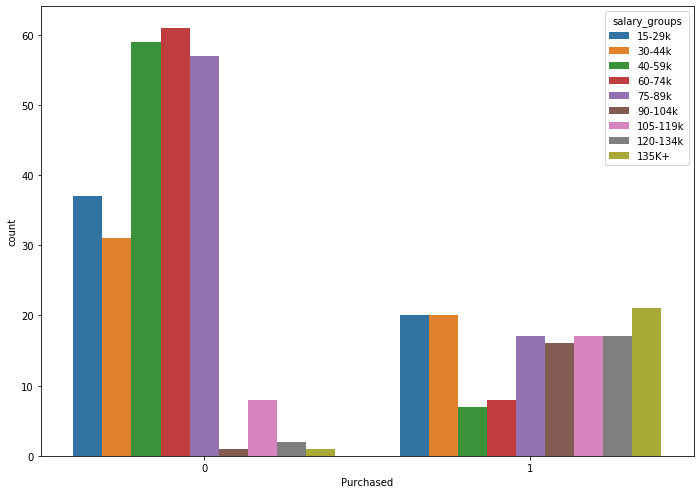

In [11]:
# plotting the count plot

from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27

sns.countplot(x="Purchased", hue="salary_groups", data=data)

In [12]:
# info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   User ID          400 non-null    int64   
 1   Gender           400 non-null    object  
 2   Age              400 non-null    int64   
 3   EstimatedSalary  400 non-null    int64   
 4   Purchased        400 non-null    int64   
 5   age_groups       400 non-null    category
 6   salary_groups    400 non-null    category
dtypes: category(2), int64(4), object(1)
memory usage: 17.1+ KB


### Important observations from the analysis

Upon analysis of the data, the following observations are made about the SUV buyers:
 - Less than 50% of the car buyers bought SUVs.
 - Females bought more SUVs than males.
 - Youngsters tend not to buy SUVs whereas, older people in the age groups of 40-60 are more likely to buy SUVs.
 - Most number of SUVs were bought by people with the highest salaries. Interestingly, the second highest number of SUV buyers belonged to the salary group of between 15000 - 45000, which is the lowest salary bracket in the data set.

## Data Wrangling

In [13]:
# finding if there are null values or unusable data in the set

data.isnull()

,User ID,Gender,Age,EstimatedSalary,Purchased,age_groups,salary_groups
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
395,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False
397,False,False,False,False,False,False,False
398,False,False,False,False,False,False,False


In [14]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
age_groups         0
salary_groups      0
dtype: int64

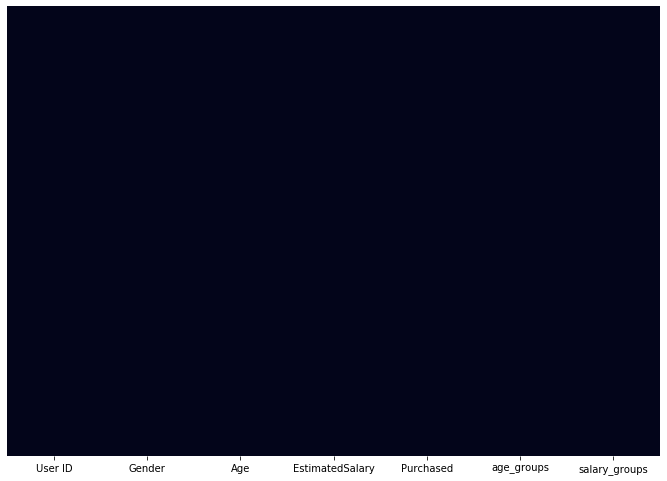

In [15]:
sns.heatmap(data.isnull(), cbar=False, yticklabels=False)

Luckily, the data set has no null values in them so we don't have to bother about it.

In [16]:
# Conversion of string valued fields into binary categories

data['sex'] = pd.get_dummies(data['Gender'], drop_first=True)
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,age_groups,salary_groups,sex
0,15624510,Male,19,19000,0,18-29,15-29k,1
1,15810944,Male,35,20000,0,30-39,15-29k,1
2,15668575,Female,26,43000,0,18-29,30-44k,0
3,15603246,Female,27,57000,0,18-29,40-59k,0
4,15804002,Male,19,76000,0,18-29,75-89k,1


In [17]:
# dropping unnecessary columns for data training

data.drop(['User ID','Gender', 'age_groups', 'salary_groups'], axis=1 ,inplace=True)

In [18]:
data.head()

,Age,EstimatedSalary,Purchased,sex
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


## Training the Logistic Regression Model

In [23]:
# Defining the dependent and independent variables

X = data.drop("Purchased", axis=1)
y= data["Purchased"]

In [20]:
# Splitting data set into training and test sets

from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [46]:
# Training the model

from sklearn.linear_model import LogisticRegression

In [47]:
logmod = LogisticRegression()

In [48]:
logmod.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
# Predictions made by the trained model

predictions = logmod.predict(X_test)

In [50]:
# confusion matrix

from sklearn.metrics import confusion_matrix

In [51]:
confusion_matrix(y_test, predictions)

array([[58,  0],
       [22,  0]], dtype=int64)

In [52]:
# accuracy 

from sklearn.metrics import accuracy_score

In [53]:
accuracy_score(y_test, predictions)*100

72.5